In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

path = pd.read_csv('green_tripdata_2019-12.csv', sep=',')
path2 = pd.read_csv('green_tripdata_2020-01.csv', sep=',')

dict_zone = pd.read_csv('taxi+_zone_lookup.csv', sep=',')


dict_zone_df = pd.DataFrame.from_records(dict_zone, columns=['LocationID',
                                                             'Borough',
                                                             'Zone',
                                                             'service_zone'])



green_12_19_df = pd.DataFrame.from_records(path, columns=['VendorID',
                                                                 'lpep_pickup_datetime',
                                                                 'lpep_dropoff_datetime',
                                                                 'store_and_fwd_flag',
                                                                 'RatecodeID',
                                                                 'PULocationID',
                                                                 'DOLocationID',
                                                                 'passenger_count',
                                                                 'trip_distance',
                                                                 'fare_amount',
                                                                 'extra',
                                                                 'mta_tax',
                                                                 'tip_amount',
                                                                 'tolls_amount',
                                                                 'ehail_fee',
                                                                 'improvement_surcharge',
                                                                 'total_amount',
                                                                 'payment_type',
                                                                 'trip_type',
                                                                 'congestion_surcharge'])

green_01_20_df = pd.DataFrame.from_records(path2, columns=['VendorID',
                                                                 'lpep_pickup_datetime',
                                                                 'lpep_dropoff_datetime',
                                                                 'store_and_fwd_flag',
                                                                 'RatecodeID',
                                                                 'PULocationID',
                                                                 'DOLocationID',
                                                                 'passenger_count',
                                                                 'trip_distance',
                                                                 'fare_amount',
                                                                 'extra',
                                                                 'mta_tax',
                                                                 'tip_amount',
                                                                 'tolls_amount',
                                                                 'ehail_fee',
                                                                 'improvement_surcharge',
                                                                 'total_amount',
                                                                 'payment_type',
                                                                 'trip_type',
                                                                 'congestion_surcharge'])


green_12_19_df = pd.concat( [green_12_19_df, green_01_20_df], ignore_index=False)


query_final = pd.merge(green_12_19_df, dict_zone_df, how='left', left_on='PULocationID', right_on='LocationID').rename(
    columns={'Borough': 'Borough_PULocationID', 'Zone': 'Zone_PULocationID', 'service_zone': 'service_zone_PULocationID'})

query_final = pd.merge(query_final, dict_zone_df, how='left', left_on='DOLocationID', right_on='LocationID').rename(
    columns={'Borough': 'Borough_DOLocationID', 'Zone': 'Zone_DOLocationID', 'service_zone': 'service_zone_DOLocationID'})

# Удаляем ненужные столбцы
query_final = query_final.drop(columns=['VendorID','LocationID_y', 'LocationID_x', 'ehail_fee'])
query_final.head()
# query_final.dtypes

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Borough_PULocationID,Zone_PULocationID,service_zone_PULocationID,Borough_DOLocationID,Zone_DOLocationID,service_zone_DOLocationID
0,2019-12-01 00:09:45,2019-12-01 00:10:59,N,1.0,145,145,1.0,0.00,3.0,0.5,0.5,0.00,0.0,0.3,4.30,2.0,1.0,0.0,Queens,Long Island City/Hunters Point,Boro Zone,Queens,Long Island City/Hunters Point,Boro Zone
1,2019-12-01 00:26:05,2019-12-01 00:31:30,N,1.0,24,41,1.0,0.67,5.5,0.5,0.5,2.04,0.0,0.3,8.84,1.0,1.0,0.0,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Harlem,Boro Zone
2,2019-12-01 00:56:36,2019-12-01 00:59:38,N,1.0,74,41,1.0,0.61,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2.0,1.0,0.0,Manhattan,East Harlem North,Boro Zone,Manhattan,Central Harlem,Boro Zone
3,2019-12-01 00:26:20,2019-12-01 00:40:19,N,1.0,255,157,1.0,3.90,14.0,0.5,0.5,0.00,0.0,0.3,15.30,2.0,1.0,0.0,Brooklyn,Williamsburg (North Side),Boro Zone,Queens,Maspeth,Boro Zone
4,2019-12-01 00:56:36,2019-12-01 00:59:56,N,1.0,80,255,1.0,0.50,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2.0,1.0,0.0,Brooklyn,East Williamsburg,Boro Zone,Brooklyn,Williamsburg (North Side),Boro Zone


Описание данных:

In [3]:
query_final.describe(include='all')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Borough_PULocationID,Zone_PULocationID,service_zone_PULocationID,Borough_DOLocationID,Zone_DOLocationID,service_zone_DOLocationID
count,898397,898397,691621,691621.000000,898397.000000,898397.000000,691621.000000,898397.000000,898397.000000,898397.000000,898397.000000,898397.000000,898397.000000,898395.000000,898397.000000,691621.000000,691618.000000,691619.000000,898397,897781,896575,898397,896180,892871
unique,686318,686114,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,255,4,7,258,4
top,2020-01-09 15:25:00,2020-01-09 10:15:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
freq,27,26,689496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311694,70617,870765,334020,33117,721252
mean,NaN,NaN,NaN,1.102273,107.799899,128.654630,1.307998,3.521963,15.712707,0.863623,0.414312,0.924702,0.308308,0.278797,18.817378,1.465414,1.023133,0.448488,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.643290,70.895855,76.266399,0.961085,82.958205,12.805314,1.158290,0.191595,2.252114,1.414476,0.079545,14.255113,0.520314,0.150325,1.015987,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,-9436.330000,-210.000000,-4.500000,-0.500000,-90.500000,-6.120000,-0.300000,-210.300000,1.000000,1.000000,-2.750000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,52.000000,63.000000,1.000000,1.060000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,82.000000,129.000000,1.000000,2.000000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.300000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,166.000000,193.000000,1.000000,4.200000,20.730000,1.000000,0.500000,1.500000,0.000000,0.300000,24.440000,2.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


На основе анализа полученных данных, стоит отметить, что некоторые поля содержат отрицательные значения. Необходимо исключить такие значения для минимизации искажений.
Фильтрация данных:

In [4]:
query_final.shape
query_final.dropna().shape

query_final = query_final.loc[query_final['trip_distance'] > 0]
query_final = query_final.loc[query_final['fare_amount'] >= 0]
query_final = query_final.loc[query_final['tip_amount'] >= 0]
query_final = query_final.loc[query_final['total_amount'] >= 0]
query_final.describe(include='all')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,Borough_PULocationID,Zone_PULocationID,service_zone_PULocationID,Borough_DOLocationID,Zone_DOLocationID,service_zone_DOLocationID
count,863252,863252,662212,662212.000000,863252.000000,863252.000000,662212.000000,863252.000000,863252.000000,863252.000000,863252.000000,863252.000000,863252.000000,863251.000000,863252.000000,662212.000000,662211.000000,662211.000000,863252,862773,862423,863252,861199,860044
unique,663050,662716,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,254,4,7,258,4
top,2020-01-09 15:25:00,2020-01-09 11:10:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem North,Boro Zone
freq,27,26,660540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305555,69706,837831,327104,32415,691710
mean,NaN,NaN,NaN,1.080832,107.121536,128.415065,1.315394,3.720676,15.560730,0.880589,0.416595,0.948803,0.300777,0.280315,18.714560,1.469072,1.018526,0.467209,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.553787,70.573094,76.130140,0.970897,83.881392,12.555289,1.158135,0.186608,2.239024,1.399488,0.074287,14.033042,0.510394,0.134843,1.032639,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.010000,0.000000,0.000000,-0.500000,0.000000,0.000000,-0.300000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,52.000000,63.000000,1.000000,1.140000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,8.800000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,82.000000,129.000000,1.000000,2.100000,11.000000,0.500000,0.500000,0.000000,0.000000,0.300000,14.120000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,166.000000,193.000000,1.000000,4.360000,20.430000,1.000000,0.500000,1.560000,0.000000,0.300000,24.310000,2.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Для проверки корреляции добавим дополнительные столбцы с данными

In [5]:
query_final['lpep_pickup_datetime'] = query_final['lpep_pickup_datetime'].astype('datetime64[ns]')
query_final['lpep_dropoff_datetime'] = query_final['lpep_dropoff_datetime'].astype('datetime64[ns]')

# Время в пути
query_final['time_difference'] = ((pd.to_datetime(query_final['lpep_dropoff_datetime']) - 
                            pd.to_datetime(query_final['lpep_pickup_datetime']))
                                .astype('<m8[m]').astype(int))
# День недели
query_final['week_day'] = (query_final['lpep_pickup_datetime'].dt.dayofweek)

# Час
query_final['hour'] = (query_final['lpep_pickup_datetime'].dt.hour)

# Номер дня в месяце
query_final['day_of_month'] = (query_final['lpep_pickup_datetime'].dt.day)


query_final.head()
query_final.isnull().sum().sort_values(ascending=False)

congestion_surcharge         201041
trip_type                    201041
passenger_count              201040
store_and_fwd_flag           201040
RatecodeID                   201040
payment_type                 201040
service_zone_DOLocationID      3208
Zone_DOLocationID              2053
service_zone_PULocationID       829
Zone_PULocationID               479
improvement_surcharge             1
PULocationID                      0
extra                             0
DOLocationID                      0
lpep_dropoff_datetime             0
trip_distance                     0
fare_amount                       0
day_of_month                      0
mta_tax                           0
tip_amount                        0
tolls_amount                      0
hour                              0
total_amount                      0
Borough_PULocationID              0
Borough_DOLocationID              0
time_difference                   0
week_day                          0
lpep_pickup_datetime        

Проверим некоторые гипотезы:

1) Первый график представляет собой столбчатую диаграмму распределения пассажиров, абсцисса второго графика - это количество пассажиров, а ордината - стоимость проезда, Мы видим, что пассажиры чаще всего путешествуют в одиночку, а самые высокие тарифы, похоже, приходят из такси только с одним пассажиром.


/opt/jupyterhub-envs/conda3-analyst/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/jupyterhub-envs/conda3-analyst/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


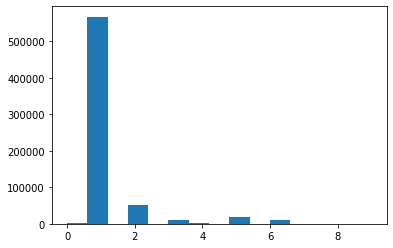

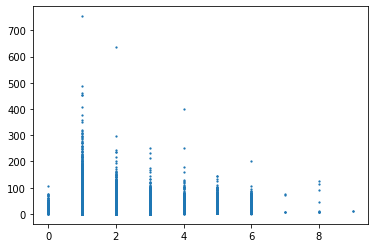

In [6]:
plt.hist(query_final['passenger_count'], bins=15)
plt.show()


plt.scatter(x=query_final['passenger_count'], y=query_final['total_amount'], s=1.5)
plt.show()


2) Дата и время получения 
На рисунке ниже абсцисса - это дата, а ордината - стоимость проезда. Видно, что большинство тарифов за весь месяц кажутся одинаковыми, а самый высокий тариф - 30-го
Наибольшее количесво поездок в конце месяца.

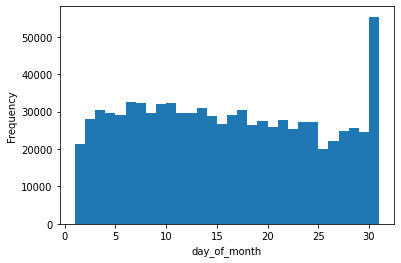

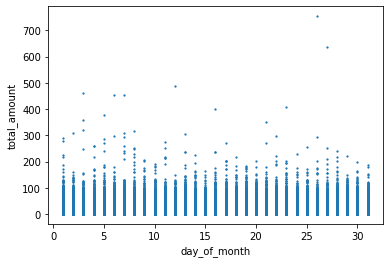

In [8]:
plt.hist(query_final['day_of_month'], bins=30)
plt.xlabel('day_of_month')
plt.ylabel('Frequency')
plt.show()

plt.scatter(x=query_final['day_of_month'], y=query_final['total_amount'], s=1.5)
plt.xlabel('day_of_month')
plt.ylabel('total_amount')
plt.show()

3) Распределение по времени приема и стоимость поездки в зависимости от времени приема
Из приведенных ниже двух графиков первый график представляет собой график распределения времени приема пассажиров, абсцисса второго графика - время, а ордината - стоимость проезда. Время суток играет важную роль.

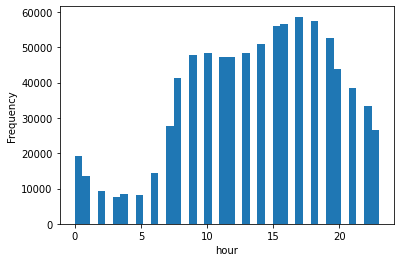

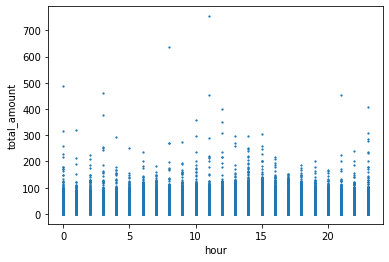

In [10]:
plt.hist(query_final['hour'], bins=40)
plt.xlabel('hour')
plt.ylabel('Frequency')
plt.show()

plt.scatter(x=query_final['hour'], y=query_final['total_amount'], s=1.5)
plt.xlabel('hour')
plt.ylabel('total_amount')
plt.show()

4) День недели и стоимость проезда
Из двух приведенных ниже диаграмм первый график - это график распределения частот для каждого дня недели, абсцисса второго графика - это день недели, а ордината - это тариф. Мы видим, что день недели мало влияет на количество поездок на такси.
Самый высокий тариф, по-видимому, в воскресенье и понедельник, а самый низкий тариф - в среду и пятницу. Возможно, люди путешествуют далеко в воскресенье и понедельник (посещают членов семьи и возвращаются домой), поэтому стоимость проезда высока. Люди просто хотят больше оставаться дома в пятницу после напряженной недели

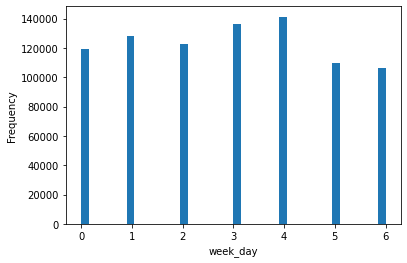

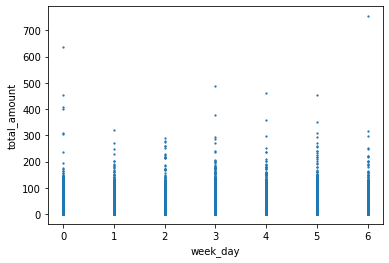

In [11]:
plt.hist(query_final['week_day'], bins=40)
plt.xlabel('week_day')
plt.ylabel('Frequency')
plt.show()

plt.scatter(x=query_final['week_day'], y=query_final['total_amount'], s=1.5)
plt.xlabel('week_day')
plt.ylabel('total_amount')
plt.show()

5) Расстояние
Очевидно, расстояние сильно повлияет на стоимость проезда. Проверим частоту расстояния.
Из рисунка ниже видно, что максимальное расстояние превышает 100 км.  Возможно, это выбросы, которые могут быть связаны с ошибками или отсутствием значений.

Text(0, 0.5, 'Frequency')

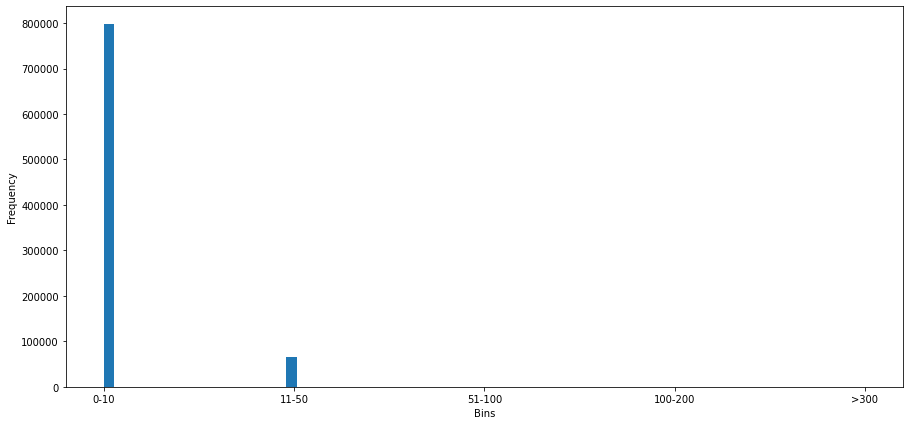

In [12]:
bins_0 = query_final.loc[(query_final['trip_distance'] == 0), ['trip_distance']]
bins_1 = query_final.loc[(query_final['trip_distance'] > 0) & (query_final['trip_distance'] <= 10),['trip_distance']]
bins_2 = query_final.loc[(query_final['trip_distance'] > 10) & (query_final['trip_distance'] <= 50),['trip_distance']]
bins_3 = query_final.loc[(query_final['trip_distance'] > 50) & (query_final['trip_distance'] <= 100),['trip_distance']]
bins_4 = query_final.loc[(query_final['trip_distance'] > 100) & (query_final['trip_distance'] <= 200),['trip_distance']]
bins_5 = query_final.loc[(query_final['trip_distance'] > 200) & (query_final['trip_distance'] <= 300),['trip_distance']]
bins_6 = query_final.loc[(query_final['trip_distance'] > 300),['trip_distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [ ]:
query_final_new = query_final[["total_amount", "passenger_count", 'trip_distance', 'time_difference', 'hour']]


print(query_final_new['total_amount'].corr(query_final_new['passenger_count']))
print(query_final_new['total_amount'].corr(query_final_new['trip_distance']))
print(query_final_new['total_amount'].corr(query_final_new['time_difference']))
sns.heatmap(query_final_new.corr(), cmap='coolwarm', linecolor='white', linewidths=1, annot=True)

# Рандомные 30% выборки
a_3 = query_final_new.sample(frac = 0.3)
sns.lmplot(x='total_amount', y='trip_distance', height=4, aspect=2, data=a_3)

0.0037554461515868034
0.04597725671670684
0.13160621044521356


Распределение по стоимости поездки имеет выраженную асимметрию. Хвост с правой стороны намного длиннее, чем с левой, и поэтому асимметрия - положительная.

т.к мы имеет большую выборку данных, для проверки на нормальность можно:
- подобрать адекватный уровень значимости, но с научной точки зрения конкретного правила для этого не существует
- отобрать случайным образом 30% наблюдений из выборки и постороить распределение (сделать 6x таких выборок)
По итогу если из 6-ти сгенерированных выборок большинство будут приближены к нормальному распределению то относим его к нормальному.
- постоить график рассеяния

<AxesSubplot:>

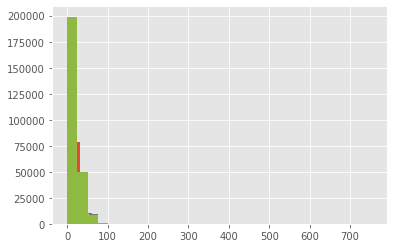

In [20]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

a_1 = query_final_new.sample(frac = 0.3)
a_2 = query_final_new.sample(frac = 0.3)
a_3 = query_final_new.sample(frac = 0.3)
a_4 = query_final_new.sample(frac = 0.3)
a_5 = query_final_new.sample(frac = 0.3)
a_6 = query_final_new.sample(frac = 0.3)
a_1['total_amount'].hist(bins=30)
a_2['total_amount'].hist(bins=30)
a_3['total_amount'].hist(bins=30)
a_4['total_amount'].hist(bins=30)
a_5['total_amount'].hist(bins=30)
a_6['total_amount'].hist(bins=30)

Четко выраженная асимметрия. Хвост с правой стороны намного длиннее, чем с левой, и поэтому асимметрия - положительная.

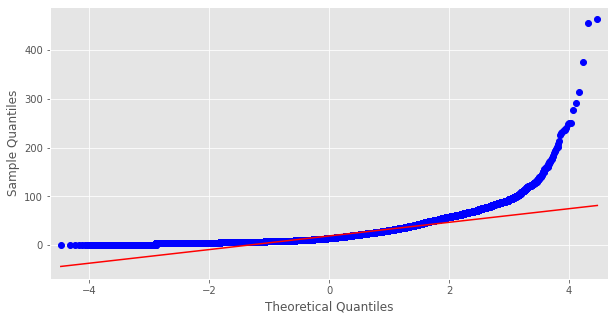

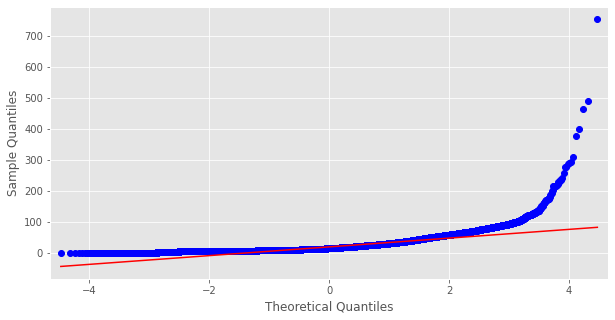

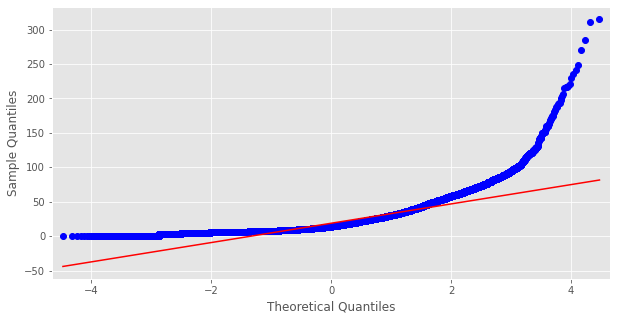

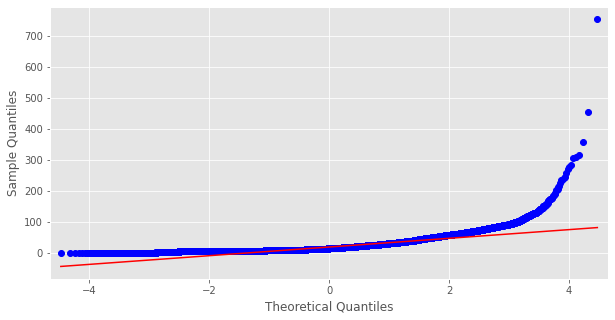

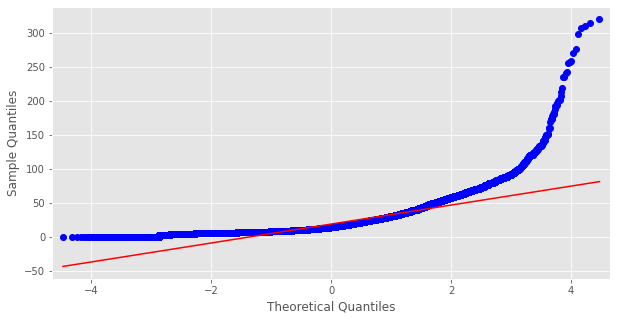

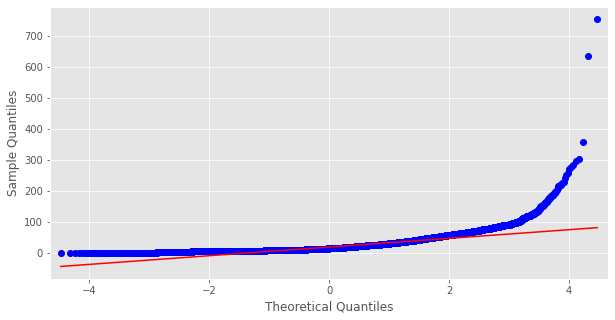

In [21]:
alpha = 0.01
            
plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots()
qqplot(a_1['total_amount'], line='s', ax=ax)    
pyplot.show()


plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots()
qqplot(a_2['total_amount'], line='s', ax=ax)    
pyplot.show()

plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots()
qqplot(a_3['total_amount'], line='s', ax=ax)    
pyplot.show()

plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots()
qqplot(a_4['total_amount'], line='s', ax=ax)    
pyplot.show()
            
plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots()
qqplot(a_5['total_amount'], line='s', ax=ax)    
pyplot.show()

plt.rcParams['figure.figsize']=(10,5)
fig, ax = plt.subplots()
qqplot(a_6['total_amount'], line='s', ax=ax)    
pyplot.show()
# не подходит для проверки на нормальность тк в ввыборке более 5к наблюдений
# w, p = shapiro(a_1['total_amount'])
# if p > alpha:
#     print('Gaussian')
# else:
#     print('does not Gaussian')

5) Модель, описывающая тариф 

In [ ]:
query_model = query_final[["total_amount", "passenger_count", 'trip_distance', 'time_difference','week_day',
                              'hour', 'day_of_month']]


In [130]:
import lightgbm as lgbm


params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }